In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def twoPointDerivative(func, dt):
    derivative = np.zeros_like(func)
    for i in range(1, len(derivative) - 1):
        derivative[i] = (func[i + 1] - func[i - 1]) / (2 * dt)
    return derivative

# Вариант 9

### Задание 1

$f_1(t) = \cos^2(20 \pi t) + \sin(10 \pi t)$

$f_2(t) = t^2 + 0.5 t$

Производная

$f_1'(t) = 2 \cos(20 \pi t)(-\sin(20 \pi t))\cdot 20 \pi + 10\pi\cos(10 \pi t) = - 20 \pi \sin(40 \pi t)+ 10\pi\cos(10 \pi t)$

$f_2'(t) = 2t + 0.5$

### Задание 2

Для функции 1 зададим промежуток, чтобы уложилось несколько периодов (будем считать по функции с наименьшей частотой):

Период $T = \dfrac{2 \pi}{\omega} = 0.2$, тогда возьмём, например, четыре периода

In [92]:
T = 0.2
time_ax = np.linspace(0, 8 * T, 700)

In [93]:
f_1 = lambda t : (np.cos(20 * np.pi * t)) ** 2 + np.sin(10 * np.pi * t)

f_1_array = f_1(time_ax)

In [94]:
analytical_derivative = lambda t : 10 * np.pi * (np.cos(10 * np.pi * t) - 2 * np.sin(40 * np.pi * t))
analyt_deriv_array = analytical_derivative(time_ax)

### По двум точкам

In [95]:
new_derivative = np.zeros((len(f_1_array)))
dt = np.diff(time_ax)[0]
for i in range(1, len(new_derivative) - 1):
    new_derivative[i] = (f_1_array[i + 1] - f_1_array[i - 1]) / (2 * dt)


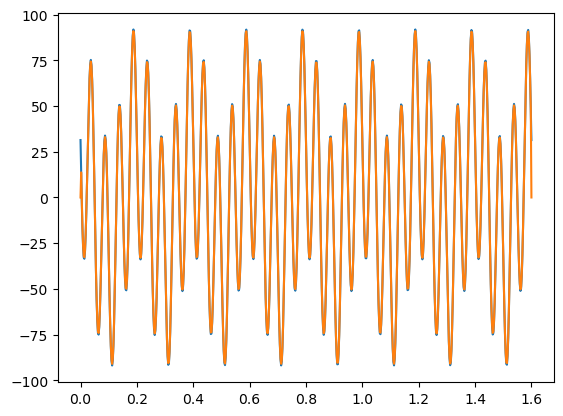

In [96]:
plt.plot(time_ax, analyt_deriv_array)
plt.plot(time_ax, new_derivative)

### Через преобразование Фурье

In [97]:
f_1_fourier = np.fft.fft(f_1_array)
freq_array = 2 * np.pi * np.fft.fftfreq(len(f_1_array), dt)

fourier_derivative = np.fft.ifft(1j*freq_array*f_1_fourier)

c:\Users\roman\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


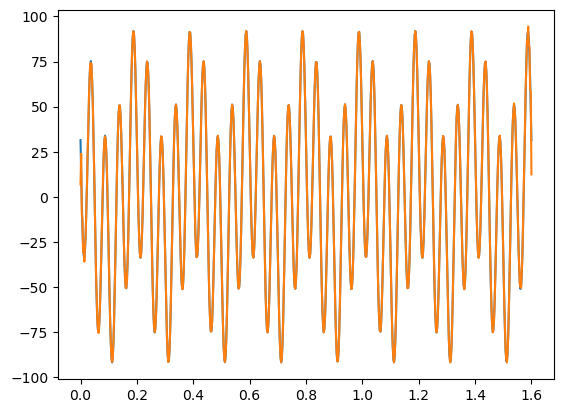

In [98]:
plt.plot(time_ax, analyt_deriv_array)
plt.plot(time_ax, fourier_derivative)

### С шумом

In [99]:
sigma = 6e-2
noise = np.random.normal(0, sigma, len(time_ax))
f_1_noisy = f_1_array + noise

### По двум точкам

In [100]:
noisyDeriv = twoPointDerivative(f_1_noisy, dt)

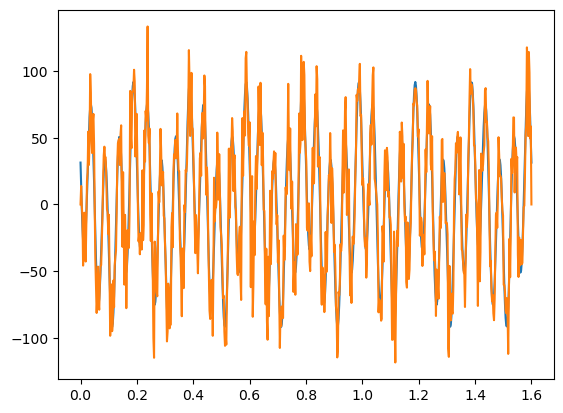

In [101]:
plt.plot(time_ax, analyt_deriv_array)
plt.plot(time_ax, noisyDeriv)

In [102]:
def relError(result, target):
    n = len(target)
    return np.linalg.norm(target[1:n - 1] - result[1:n-1]) / np.linalg.norm(target[1:n-1])

In [103]:
window = np.zeros_like(f_1_array)
halfWidth = 100
for i in range(halfWidth):
    window[i] = 1
    window[-(i + 1)] = 1

(0.0, 5.0)

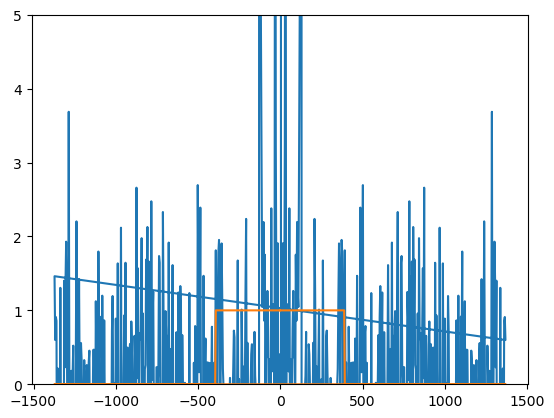

In [104]:
plt.plot(freq_array, np.fft.fft(f_1_noisy))
plt.plot(freq_array, window)
plt.ylim(0,5)

In [105]:
def fourierDerivative(func, dt):
    window = np.zeros_like(func)
    halfWidth = 100
    for i in range(halfWidth):
        window[i] = 1
        window[-(i + 1)] = 1
    fourier = np.fft.fft(func)
    freq = 2 * np.pi * np.fft.fftfreq(len(func), dt)
    return np.fft.ifft(1j * freq * fourier * window)
    

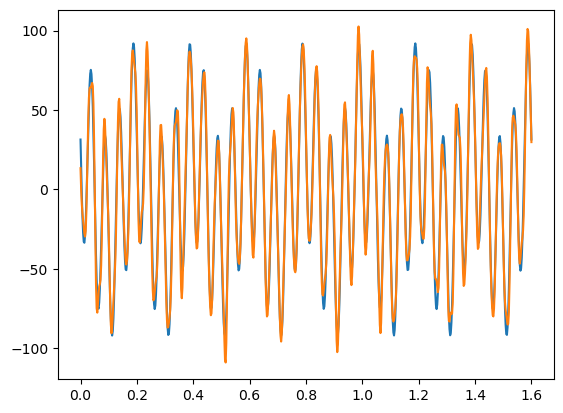

In [106]:
plt.plot(time_ax, analyt_deriv_array)
plt.plot(time_ax, fourierDerivative(f_1_noisy, dt))

In [107]:
# посчитаем для разных значений шума
noise_range = np.logspace(-5, -1, 100)
relErrorArrayFourier = np.zeros_like(noise_range)
relErrorArrayTwoPoint = np.zeros_like(noise_range)

In [108]:
for i in range(len(noise_range)):
    sigma = noise_range[i]
    noise = np.random.normal(0, sigma, len(time_ax))
    f_noisy = f_1_array + noise
    fourierDeriv = fourierDerivative(f_noisy, dt)
    twoPointDeriv = twoPointDerivative(f_noisy, dt)
    relErrorArrayFourier[i] = relError(fourierDeriv, analyt_deriv_array)
    relErrorArrayTwoPoint[i] = relError(twoPointDeriv, analyt_deriv_array)

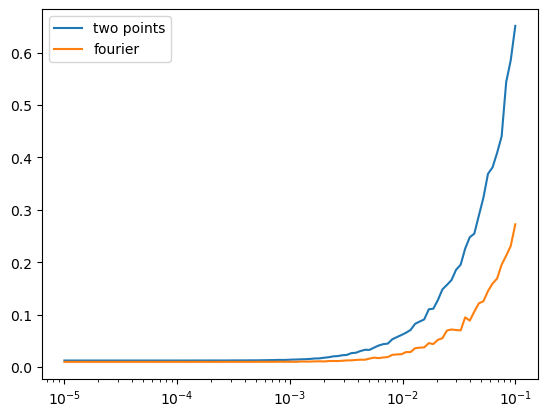

In [109]:
plt.plot(noise_range, relErrorArrayTwoPoint, label='two points')
plt.plot(noise_range, relErrorArrayFourier, label='fourier')
plt.xscale('log')
plt.legend()

### Задание 3

In [110]:
f_2 = lambda t : t ** 2 + 0.5 * t
f_2_array = f_2(time_ax)

f_2_deriv = lambda t : 2 * t + 0.5
f_2_deriv_array = f_2_deriv(time_ax)

(-5.0, 5.0)

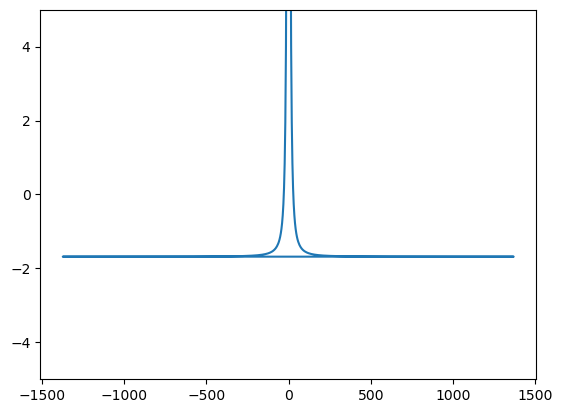

In [111]:
plt.plot(freq_array, np.fft.fft(f_2_array))
plt.ylim(-5, 5)

In [112]:
def polyFitDerivative(x, func):
    coeffs = np.polyfit(x, func, 2)
    result = lambda t: 2 * coeffs[0] * t + coeffs[1]
    return result(x)


In [113]:
# посчитаем для разных значений шума
noise_range = np.logspace(-5, -1.5, 100)
relErrorArrayFourier = np.zeros_like(noise_range)
relErrorArrayTwoPoint = np.zeros_like(noise_range)
relErrorLS = np.zeros_like(noise_range)

In [114]:
for i in range(len(noise_range)):
    sigma = noise_range[i]
    noise = np.random.normal(0, sigma, len(time_ax))
    f_noisy = f_2_array + noise
    fourierDeriv = fourierDerivative(f_noisy, dt)
    twoPointDeriv = twoPointDerivative(f_noisy, dt)
    lsDeriv = polyFitDerivative(time_ax, f_noisy)
    relErrorArrayFourier[i] = relError(fourierDeriv, f_2_deriv_array)
    relErrorArrayTwoPoint[i] = relError(twoPointDeriv, f_2_deriv_array)
    relErrorLS[i] = relError(lsDeriv, f_2_deriv_array)

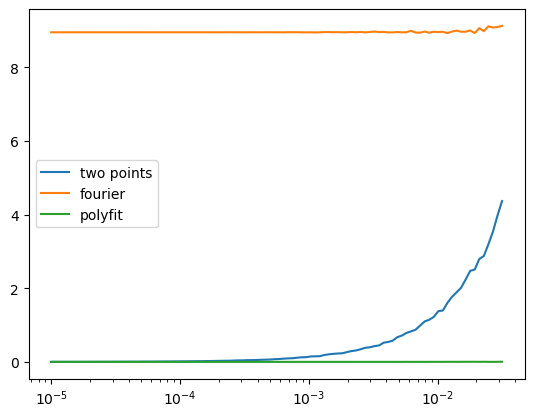

In [115]:
plt.plot(noise_range, relErrorArrayTwoPoint, label='two points')
plt.plot(noise_range, relErrorArrayFourier, label='fourier')
plt.plot(noise_range, relErrorLS, label='polyfit')
plt.xscale('log')
plt.legend()